<a href="https://colab.research.google.com/github/dSudario9/Decision_Tree/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
# Import bibliotecas.

from sklearn import datasets
import pandas as pd 

**Import Dataset**

In [54]:
iris= datasets.load_iris()

In [55]:
#import da base de dados. 
iris_df = pd.DataFrame(iris["data"],columns=iris["feature_names"])
iris_df["target"]=iris["target"]
iris_df["target_name"]= pd.Categorical.from_codes(iris_df["target"],iris["target_names"])


**Import do Modelo Classificador Decision Tree Classifier **

In [57]:

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection  import train_test_split

In [58]:
# Separação dos Dados Preditores e respostas. 

X = iris_df.drop(columns=["target_name" , "target"])   # Predidores 
y = iris_df[["target"]]  # Resposta

**Separar dados de Train e Test **

In [61]:
X_train , X_test , y_train, y_test = train_test_split(X ,y , test_size= 0.3, random_state=7)

# Estamos usando 30% dos dados para test. 

In [62]:
# Conferindo Distribuição  dos Dados. 

print(" Distribuição de X")
print(f"Shape X_train:{X_train.shape}")
print(f"Shape X_test:{X_test.shape}")
print(" Distribuição de y")
print(f"Shape y_train:{y_train.shape}")
print(f"Shape y_test:{y_test.shape}")

 Distribuição de X
Shape X_train:(105, 4)
Shape X_test:(45, 4)
 Distribuição de y
Shape y_train:(105, 1)
Shape y_test:(45, 1)


Treinando Modelo de Avore de Decisão 

In [63]:
#Classificador  DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy") #entropy = varial de entropia.
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
#Vamos fazer um test no algorito apos o mesmo nos dar o resultado. 

y_pred = clf.predict(X_test)

In [65]:
# Resultado de acuracia. 

from sklearn.metrics import accuracy_score

print(f"Acurácia: {accuracy_score(y_test , y_pred)*100}%")

Acurácia: 84.44444444444444%


**Visualização  Descision Tree**


In [66]:
# Grafico para vizualizar a Tree 
from  sklearn.tree import export_graphviz
import graphviz

In [67]:
#Passando paramentros para visualizar a nossa Tree 
dot_data= export_graphviz(clf,out_file=None,
                          feature_names=iris.feature_names,
                          class_names=iris.target_names,
                          filled=True, rounded=True,
                          special_characters=True)

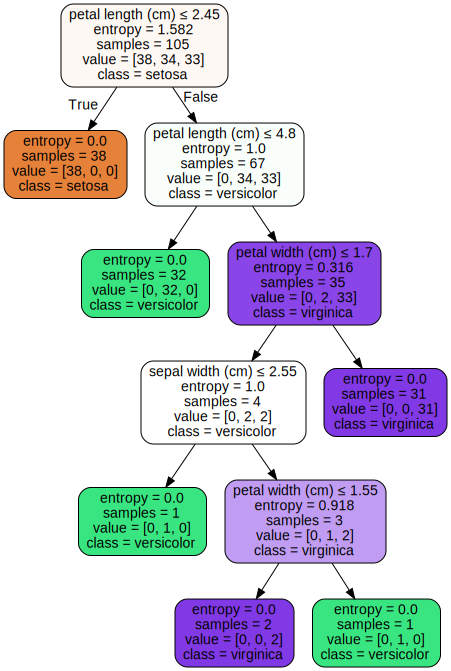

In [68]:
graph = graphviz.Source(dot_data)
graph

In [69]:
# Uma outra forma de vizualizar as Tree usando a biblioteca Dtreeviz
! pip install dtreeviz

In [71]:
# Paramentros e Biblioteca paravisualização.

from dtreeviz.trees import * 

viz= dtreeviz(clf,
              X_train.values,
              y_train["target"].values,
              target_name="target",
              feature_names= X_train.columns,
              class_names=["setosa","versicolor", "virgenica"],
              histtype= "barstacked")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


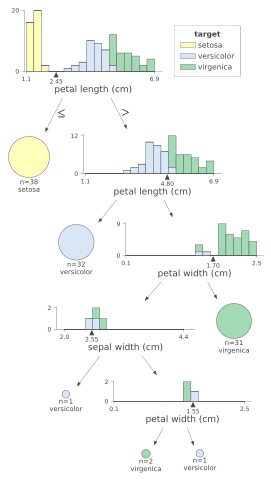

In [72]:
viz #Visualizar tree 

In [74]:
# Vamos fazer uma predição do modelo .

viz_pred = dtreeviz(clf,
                    X_train.values,
                    y_train["target"].values,
                    target_name= "variety",
                    orientation = "TD",
                    feature_names= X_train.columns,
                    X=X_test.iloc[[3]].values[0], #Observação única para previsão
                    class_names=["setosa","versicolor","virginica"],
                    show_just_path = True
                    )

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


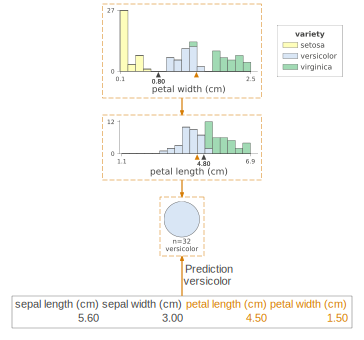

In [52]:
viz_pred

Como podemos observar que o petal width foi maior que 08 e o petal length foi menor que 4.80 e o modelo foi considerado versicolo, pois caiu na folha da arvore  n=32 versicolo. 